# **Koronavirüs (Covid-19) Salgını - Türkiye'nin Durumu (26 Ekim 2020)**

## Sayı: 23

**Her güne ait tüm sayısal veriler, Türkiye'de ilk vakanın görüldüğü 11 Mart'tan beri T. C. Sağlık Bakanlığı Covid-19 Bilgilendirme Sayfası'nda günlük olarak yayımlanan "Türkiye Günlük Koronavirüs Tablosu"ndan alınmaktadır.**

**Referans:** [covid19.saglik.gov.tr](https://covid19.saglik.gov.tr/)

**Hazırlayan:** Doğan Yiğit Yenigün (toUpperCase78)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covid19TR = pd.read_csv('covid_19_turkiye_2020_10_26.csv')

In [2]:
covid19TR = covid19TR.set_index('Tarih')
covid19TR['Hasta Artış'] = covid19TR['Toplam Hasta'].diff()
covid19TR['Vefat Artış'] = covid19TR['Toplam Vefat'].diff()
covid19TR['İyileşen Artış'] = covid19TR['Toplam İyileşen'].diff()
covid19TR['Test Artış'] = covid19TR['Toplam Test'].diff()
covid19TR['Hasta +/-'] = covid19TR['Hasta Artış'].diff()
covid19TR['Vefat +/-'] = covid19TR['Vefat Artış'].diff()
covid19TR['İyileşen +/-'] = covid19TR['İyileşen Artış'].diff()

### **Son 2 Haftaya Dair Sayısal Bilgiler**

In [3]:
covid19TR[['Toplam Hasta', 'Toplam Vefat', 'Toplam İyileşen', 'Toplam Test',
          'Hastalarda Zatürre Oranı(%)', 'Ağır Hasta']].tail(14)

,Toplam Hasta,Toplam Vefat,Toplam İyileşen,Toplam Test,Hastalarda Zatürre Oranı(%),Ağır Hasta
Tarih,,,,,,
2020-10-13,338779,8957,296972,11846342.0,5.9,1416.0
2020-10-14,340450,9014,298368,11961670.0,5.9,1418.0
2020-10-15,342143,9080,299679,12077773.0,5.9,1408.0
2020-10-16,343955,9153,301098,12194778.0,5.9,1445.0
2020-10-17,345678,9224,302499,12306909.0,5.9,1428.0
2020-10-18,347493,9296,304003,12408312.0,5.9,1427.0
2020-10-19,349519,9371,305427,12524561.0,5.6,1447.0
2020-10-20,351413,9445,306939,12641126.0,5.6,1545.0
2020-10-21,353426,9513,308446,12759069.0,5.6,1504.0


**ÖNEMLİ NOT:** 29 Temmuz'dan itibaren _Toplam Yoğun Bakım Sayısı_ ve _Toplam Entübe Hasta Sayısı_ yerine _Hastalarda Zatürre Oranı_ ve _Ağır Hasta Sayısı_ paylaşılmaya başlanmıştır.

### **Tüm Günler Türkiye'nin Durumu**

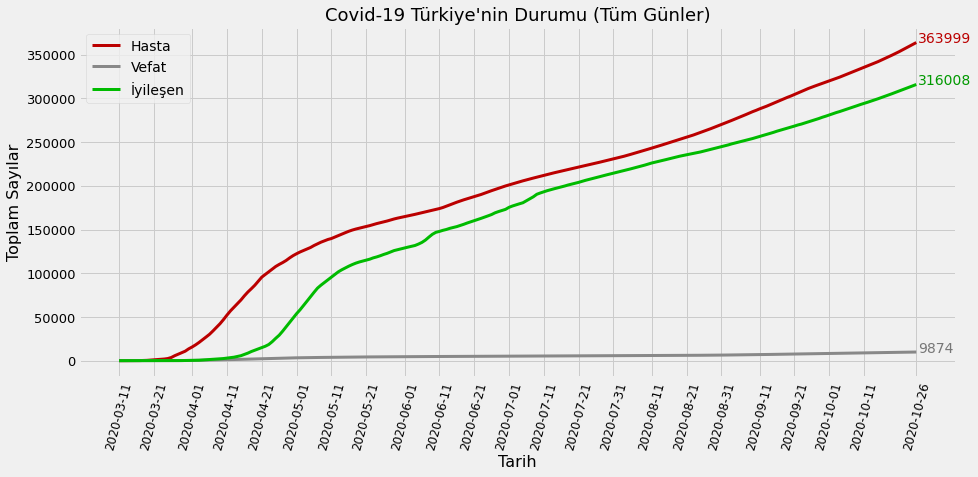

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,6))
plt.plot(covid19TR['Toplam Hasta'], linewidth=3, color='#bb0000', label='Hasta')
plt.plot(covid19TR['Toplam Vefat'], linewidth=3, color='#888888', label='Vefat')
plt.plot(covid19TR['Toplam İyileşen'], linewidth=3, color='#00bb00', label='İyileşen')
plt.text(len(covid19TR)-0.6, covid19TR['Toplam Hasta'][-1], covid19TR['Toplam Hasta'][-1], color='#bb0000')
plt.text(len(covid19TR)-0.6, covid19TR['Toplam Vefat'][-1], covid19TR['Toplam Vefat'][-1], color='#777777')
plt.text(len(covid19TR)-0.6, covid19TR['Toplam İyileşen'][-1], covid19TR['Toplam İyileşen'][-1], color='#009900')
plt.title('Covid-19 Türkiye\'nin Durumu (Tüm Günler)', fontsize=18)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Toplam Sayılar', fontsize=16)
plt.xticks([0, 10, 21, 31, 41, 51, 61, 71, 82, 92, 102, 112, 122, 132, 142, 153, 163, 173, 184, 194, 204, 214,
            len(covid19TR)-1], fontsize=12, rotation=75)
plt.yticks(fontsize=13)
plt.legend(loc='upper left', fontsize=14)
plt.show()

Türkiye'nin Koronavirüs ile mücadelesinde yukarıdaki grafiğe bakıldığında, hasta artışlarının en çok yaşandığı zaman aralığı **11-21 Nisan** günleri olarak görülmektedir (eğimi en yüksek kısım). İyileşme hızının en yüksek olduğu yer ise tahminen **26 Nisan - 6 Mayıs** tarihlerinde yaşanmıştır.

Bu grafiğe göre Ağustos'un ikinci yarısından beri hasta sayısını gösteren eğim ile iyileşen sayısını gösteren eğim arasında kalan alanın **giderek yükseldiği**, Eylül-Ekim aylarında devam ettiği açıkça görülebilmektedir.

### **Son 2 Haftaya Dair Hasta Sayısı Grafiği**

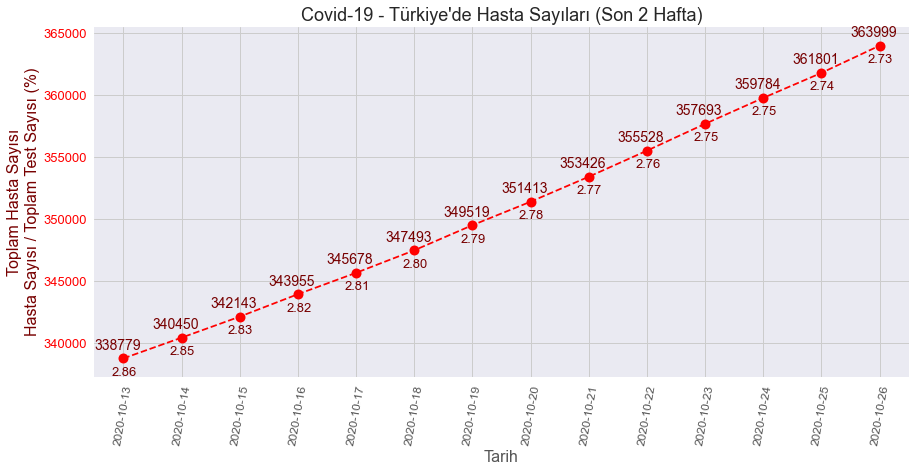

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(13,6))
plt.plot(covid19TR.index[-14:], covid19TR['Toplam Hasta'][-14:], marker='o', markersize=10, linestyle='--', color='r')
plt.axis([-0.5,13.5,min(covid19TR['Toplam Hasta'][-14:])-1500,max(covid19TR['Toplam Hasta'][-14:])+1500])
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.5), covid19TR.iloc[i,0]+700, covid19TR.iloc[i,0], fontsize=14, color='#770000')
    plt.text(i-(len(covid19TR)-13.8), covid19TR.iloc[i,0]-1400, "{:.2f}".format(covid19TR.iloc[i,0]/covid19TR.iloc[i,3]*100),
             fontsize=13, color='#770000')
plt.title('Covid-19 - Türkiye\'de Hasta Sayıları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam Hasta Sayısı\nHasta Sayısı / Toplam Test Sayısı (%)', fontsize=16, color='#770000')
plt.grid(color='#cccccc')
plt.show()

Toplam hasta sayısı grafikte görüldüğü üzere son olarak **363 bini** geçmiştir! Bu sayının toplam test sayısına oranı da **giderek azalmaya** devam etmektedir ki 26 Ekim'de bu oran **%2.73** olarak gerçekleşmiştir.

### **Son 2 Haftaya Dair Vefat Sayısı Grafiği**

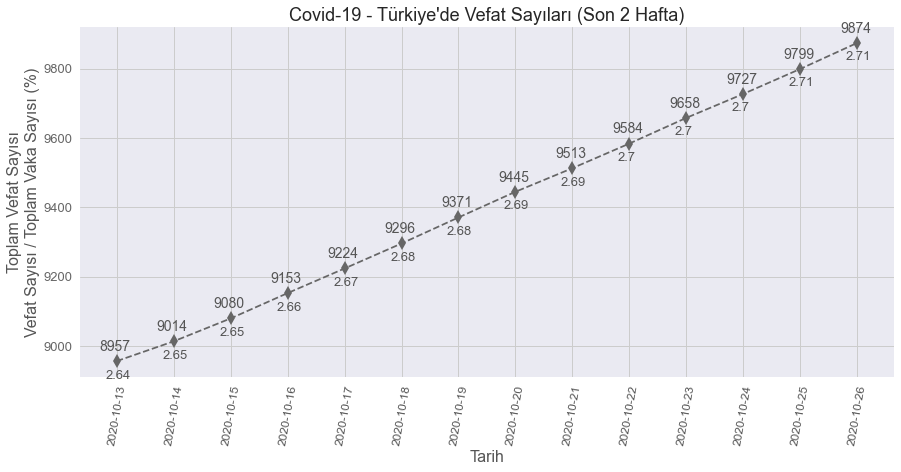

In [6]:
plt.figure(figsize=(13,6))
plt.plot(covid19TR.index[-14:], covid19TR['Toplam Vefat'][-14:], marker='d', markersize=10, linestyle='--', color='#666666')
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.7), covid19TR.iloc[i,1]+30, covid19TR.iloc[i,1], fontsize=14, color='#555555')
    plt.text(i-(len(covid19TR)-13.8), covid19TR.iloc[i,1]-50, round(covid19TR.iloc[i,1]/covid19TR.iloc[i,0]*100, 2), 
             fontsize=13, color='#555555')
plt.title('Covid-19 - Türkiye\'de Vefat Sayıları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam Vefat Sayısı\nVefat Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Toplam vefat sayısı gün geçtikçe **10 bin**'e doğru yaklaşmaktadır! Bunun yanında toplam vaka sayısına oran ne yazık ki **hafif hafif artarak %2.7**'nin üzerine çıkmıştır!

### **Son 2 Haftaya Dair İyileşen Hasta Sayısı Grafiği**

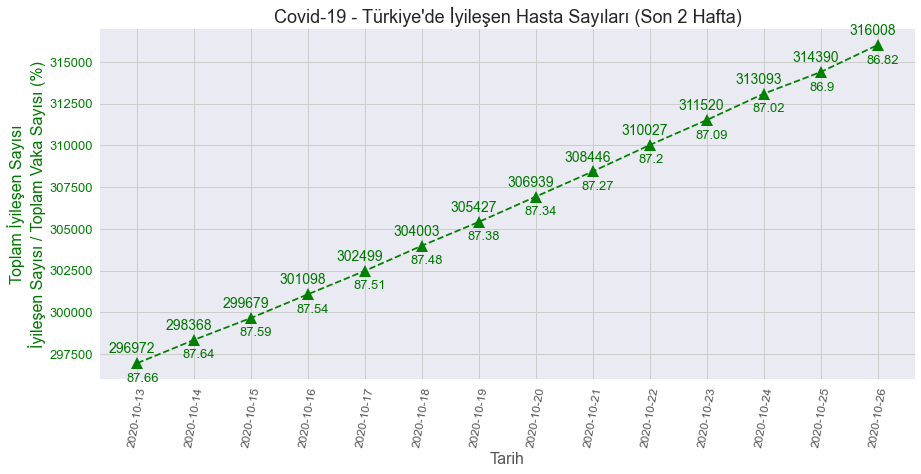

In [7]:
plt.figure(figsize=(13,6))
plt.plot(covid19TR.index[-14:], covid19TR['Toplam İyileşen'][-14:], marker='^', markersize=12, linestyle='--', color='g')
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.5), covid19TR.iloc[i,2]+600, covid19TR.iloc[i,2], fontsize=14, color='#007700')
    plt.text(i-(len(covid19TR)-13.8), covid19TR.iloc[i,2]-1100, round(covid19TR.iloc[i,2]/covid19TR.iloc[i,0]*100, 2), 
             fontsize=13, color='#007700')
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayıları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Toplam İyileşen Sayısı\nİyileşen Sayısı / Toplam Vaka Sayısı (%)', fontsize=16, color='#007700')
plt.grid(color='#cccccc')
plt.show()

İyileşen hasta sayısı ise son olarak **316 bini** geçmiştir. Bu sayının toplam vaka sayısına oranı da grafikte görüldüğü üzere giderek düşmeye devam etmektedir ki son olarak 26 Ekim'de **%86.82** olmuştur.

### **Hasta, Vefat, İyileşen & Test Artışlarına Dair İstatistikler**

In [8]:
round(covid19TR[['Hasta Artış', 'Vefat Artış', 'İyileşen Artış', 'Test Artış']].describe(), 2)

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış
count,229.00,229.00,229.00,213.00
mean,1589.51,43.12,1379.95,62455.30
std,935.58,30.48,1055.07,33919.68
min,0.00,0.00,0.00,7641.00
25%,1022.00,18.00,985.00,37351.00
50%,1429.00,29.00,1202.00,46800.00
75%,1716.00,64.00,1491.00,100109.00
max,5138.00,127.00,5213.00,132913.00


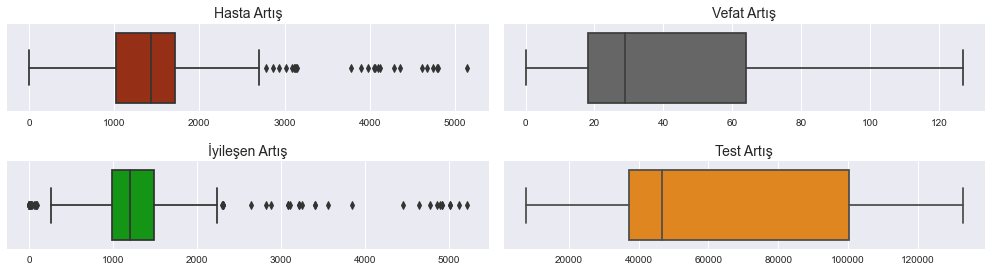

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(2,2,1)
sns.boxplot(x=['Hasta Artış'], data=covid19TR, color='#aa2200')
plt.title('Hasta Artış', fontsize=14)
plt.subplot(2,2,2)
sns.boxplot(x=['Vefat Artış'], data=covid19TR, color='#666666')
plt.title('Vefat Artış', fontsize=14)
plt.subplot(2,2,3)
sns.boxplot(x=['İyileşen Artış'], data=covid19TR, color='#00aa00')
plt.title('İyileşen Artış', fontsize=14)
plt.subplot(2,2,4)
sns.boxplot(x=['Test Artış'], data=covid19TR, color='#ff8800')
plt.title('Test Artış', fontsize=14)
plt.tight_layout()
plt.show()

### Tüm Günler - Hasta, Vefat & İyileşen Artış Sayıları + Sonraki 28 Güne Ait Tahminler

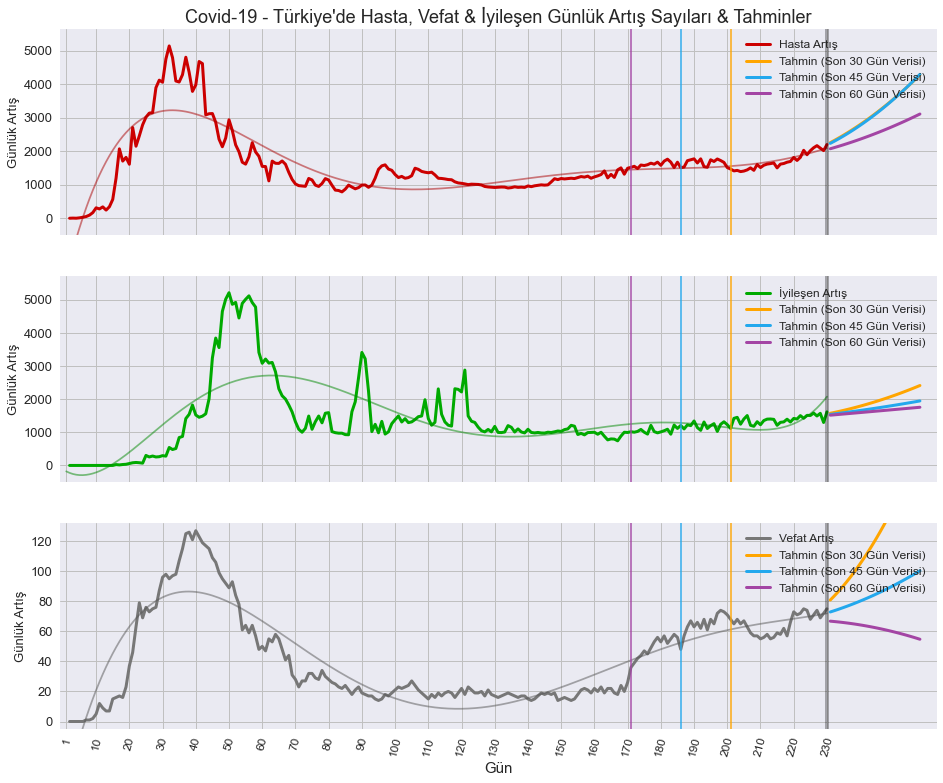

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
gun_cizgiler = np.array([0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 209,
                         219, len(covid19TR)-1])
gun_aralik = [30, 45, 60]
renk=['orange', '#23a8ed', '#a345a4']
y_pred_hepsi = []
polynomial = PolynomialFeatures(degree=2)
linear = LinearRegression()
for s in range(1,4):
    y_pred = []
    for g in gun_aralik:
        if s == 1:     y = covid19TR['Hasta Artış'].values[len(covid19TR)-g:].reshape(-1,1)
        elif s == 2:   y = covid19TR['İyileşen Artış'].values[len(covid19TR)-g:].reshape(-1,1)
        else:          y = covid19TR['Vefat Artış'].values[len(covid19TR)-g:].reshape(-1,1)
        x = np.array(list(range(len(y)))).reshape(-1,1)
        x_test = np.array(list(range(len(y), len(y)+28))).reshape(-1,1)
        x_poly = polynomial.fit_transform(x)
        x_test_poly = polynomial.fit_transform(x_test)
        linear.fit(x_poly, y)
        y_pred.append(linear.predict(x_test_poly))
    y_pred_hepsi.append(y_pred)
poly_pred = []
polynomial = PolynomialFeatures(degree=6)
for s in range(1, 4): 
    if s == 1:    y = covid19TR['Hasta Artış'].fillna(0).values.reshape(-1,1)
    elif s == 2:  y = covid19TR['İyileşen Artış'].fillna(0).values.reshape(-1,1)
    else:         y = covid19TR['Vefat Artış'].fillna(0).values.reshape(-1,1)
    x = np.array(list(range(len(y)))).reshape(-1,1)
    x_poly = polynomial.fit_transform(x)
    linear.fit(x_poly, y)
    poly_pred.append(linear.predict(x_poly))
plt.figure(figsize=(14,12))
plt.subplot(3,1,1)
plt.title('Covid-19 - Türkiye\'de Hasta, Vefat & İyileşen Günlük Artış Sayıları & Tahminler', fontsize=18)
plt.plot(covid19TR['Hasta Artış'], color='#cc0000', linewidth=3, label='Hasta Artış')
plt.plot(poly_pred[0], color='#aa0000', alpha=0.5)
plt.axis([-2, len(covid19TR)+32, covid19TR['Hasta Artış'].min()-500, covid19TR['Hasta Artış'].max()+500])
for i in range(len(gun_aralik)):
    plt.plot(x_test+len(covid19TR)-60, y_pred_hepsi[0][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik[i])  + ' Gün Verisi)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.3)
plt.xticks(gun_cizgiler, ['' for _ in range(len(gun_cizgiler))])
plt.yticks(fontsize=13)
plt.ylabel('Günlük Artış', fontsize=13)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper right', fontsize=12)
plt.subplot(3,1,2)
plt.plot(covid19TR['İyileşen Artış'], color='#00aa00', linewidth=3, label='İyileşen Artış')
plt.plot(poly_pred[1], color='#008800', alpha=0.5)
plt.axis([-2, len(covid19TR)+32, covid19TR['İyileşen Artış'].min()-500, covid19TR['İyileşen Artış'].max()+500])
for i in range(len(gun_aralik)):
    plt.plot(x_test+len(covid19TR)-60, y_pred_hepsi[1][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik[i])  + ' Gün Verisi)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.3)
plt.xticks(gun_cizgiler, ['' for _ in range(9)])
plt.yticks(fontsize=13)
plt.ylabel('Günlük Artış', fontsize=13)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper right', fontsize=12)
plt.subplot(3,1,3)
plt.plot(covid19TR['Vefat Artış'], color='#777777', linewidth=3, label='Vefat Artış')
plt.plot(poly_pred[2], color='#555555', alpha=0.5)
plt.axis([-2, len(covid19TR)+32, covid19TR['Vefat Artış'].min()-5, covid19TR['Vefat Artış'].max()+5])
for i in range(len(gun_aralik)):
    plt.plot(x_test+len(covid19TR)-60, y_pred_hepsi[2][i], color=renk[i], 
             label='Tahmin (Son ' + str(gun_aralik[i])  + ' Gün Verisi)', linewidth=3)
    plt.axvline(x=len(covid19TR)-gun_aralik[i], alpha=0.8, color=renk[i])
plt.axvline(x=len(covid19TR)-1, color='k', linewidth=4, alpha=0.3)
plt.xlabel('Gün', fontsize=15)
plt.xticks(gun_cizgiler, gun_cizgiler+1, fontsize=12, rotation=75)
plt.yticks(fontsize=13)
plt.ylabel('Günlük Artış', fontsize=13)
plt.grid(color='#c0c0c0')
plt.legend(loc='upper right', fontsize=12)
plt.show()

_Makine öğrenmesi yardımıyla ikinci derece polinom cinsinden_ gelecek dört hafta için tahminlere baktığımızda, _hasta_ sayısının **giderek artacağı** ama son 30 ve 45 güne göre **daha fazla** olabilceği; _iyileşen_ sayısının hasta sayısına göre artışın **daha az olacağı** ve son 30 gün için diğerlerine kıyasla **biraz daha fazla olabileceği**; _vefat_ sayısında ise son 60 güne göre bakıldığında **giderek azalabileceği**, ancak son 30 ve 45 güne **giderek artabileceği** ve daha da kötüsü son 30 düşünüldüğünde bu artışın **daha korkunç düzeyde** olabileceği söylenebilir! 

### **Son 2 hafta İçindeki Hasta Sayısı Artışları**

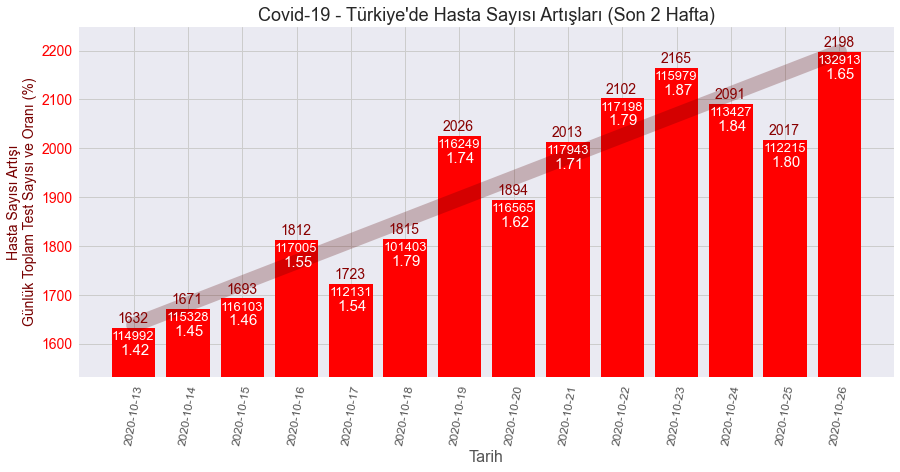

In [11]:
plt.figure(figsize=(13,6))
slp, intcp = np.polyfit(list(range(14)), covid19TR['Hasta Artış'][-14:], 1)
plt.bar(covid19TR.index[-14:], covid19TR['Hasta Artış'][-14:], color='r')
plt.axis([-1,14,covid19TR['Hasta Artış'][-14:].min()-100,covid19TR['Hasta Artış'][-14:].max()+50])
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='r', fontsize=14)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.7), covid19TR.iloc[i,8]+10, int(covid19TR.iloc[i,8]), fontsize=14, color='#880000')
    plt.text(i-(len(covid19TR)-13.6), covid19TR.iloc[i,8]-25, int(covid19TR.iloc[i,11]), fontsize=13, color='white')
    plt.text(i-(len(covid19TR)-13.75), covid19TR.iloc[i,8]-55, 
             "{:.2f}".format(round(covid19TR.iloc[i,8] / covid19TR.iloc[i,11] * 100, 2)), fontsize=15, color='white')
plt.plot([0, 13],[intcp, intcp+(slp*13)], color='#550000', linewidth=15, alpha=0.25)
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Artışları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Artışı\nGünlük Toplam Test Sayısı ve Oranı (%)', fontsize=14, color='#770000')
plt.grid(color='#cccccc')
plt.show()

Son iki haftanın günlük hasta sayıları incelendiğinde; bu sayının son bir haftada genelde **2000**'in üzerinde seyrettiği ve en çok 26 Ekim'de **2198**'a kadar çıktığı görülmektedir! Test sayısına oranlar ise her zaman **%2**'nin altında olsa da, genel anlamda vaka sayılarının yaz mevsimine kıyasla **daha yükseklerde seyretmesi** kaygı vericidir!

### **Son 2 hafta İçindeki Vefat Sayısı Artışları**

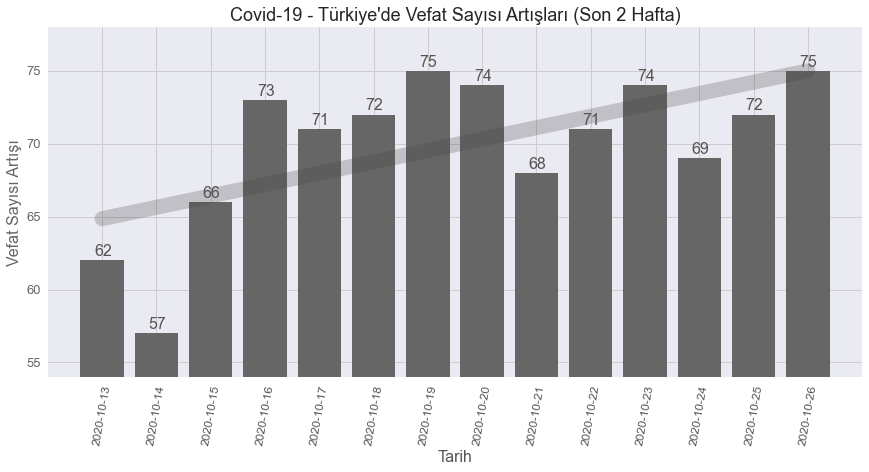

In [12]:
plt.figure(figsize=(13,6))
slp, intcp = np.polyfit(list(range(14)), covid19TR['Vefat Artış'][-14:], 1)
plt.bar(covid19TR.index[-14:], covid19TR['Vefat Artış'][-14:], color='#666666')
plt.axis([-1,14,covid19TR['Vefat Artış'][-14:].min()-3,covid19TR['Vefat Artış'][-14:].max()+3])
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#666666', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.85), covid19TR.iloc[i,9]+0.3, int(covid19TR.iloc[i,9]), fontsize=16, color='#555555')
plt.plot([0, 13], [intcp, intcp+(slp*13)], color='#444444', linewidth=15, alpha=0.25)
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Artışları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Artışı', fontsize=16, color='#666666')
plt.grid(color='#cccccc')
plt.show()

Son iki haftanın günlük vefat sayılarının yaz mevsimine nazaran **daha yüksek** sayılarda seyretmeye devam etmesi; bu sayının günlük genelde **70**'in üzerinde olması endişe vericidir!

### **Son 2 Hafta İçindeki İyileşen Hasta Sayısı Artışları**

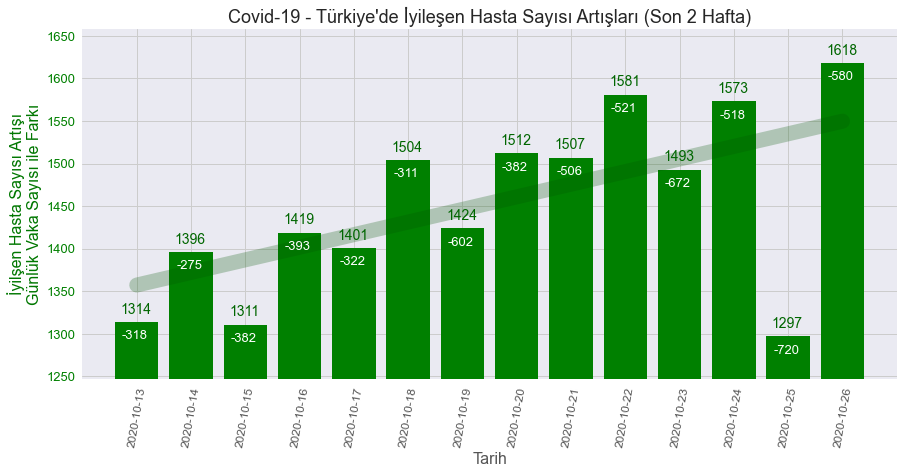

In [13]:
plt.figure(figsize=(13,6))
slp, intcp = np.polyfit(list(range(14)), covid19TR['İyileşen Artış'][-14:], 1)
plt.bar(covid19TR.index[-14:], covid19TR['İyileşen Artış'][-14:], color='g')
plt.axis([-1,14,covid19TR['İyileşen Artış'][-14:].min()-50,covid19TR['İyileşen Artış'][-14:].max()+40])
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='g', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.7), covid19TR.iloc[i,10]+10, int(covid19TR.iloc[i,10]), fontsize=14, color='#006600')
    if abs(int(covid19TR.iloc[i,10] - covid19TR.iloc[i,8])) >= 100:
        plt.text(i-(len(covid19TR)-13.73), covid19TR.iloc[i,10]-20, int(covid19TR.iloc[i,10] - covid19TR.iloc[i,8]),
             fontsize=13, color='white')
    elif abs(int(covid19TR.iloc[i,10] - covid19TR.iloc[i,8])) >= 10:
        plt.text(i-(len(covid19TR)-13.85), covid19TR.iloc[i,10]-20, int(covid19TR.iloc[i,10] - covid19TR.iloc[i,8]),
             fontsize=13, color='white')
    else:
        plt.text(i-(len(covid19TR)-13.90), covid19TR.iloc[i,10]-20, int(covid19TR.iloc[i,10] - covid19TR.iloc[i,8]),
             fontsize=13, color='white')
plt.plot([0, 13], [intcp, intcp+(slp*13)], color='#005500', linewidth=15, alpha=0.25)
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayısı Artışları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyilşen Hasta Sayısı Artışı\nGünlük Vaka Sayısı ile Farkı', fontsize=16, color='#007700')
plt.grid(color='#cccccc')
plt.show()

Günlük iyileşen hasta sayısının, son iki haftada hep hasta sayısının gerisinde kalması virüs tehlikesinin **giderek yükselmeye devam ettiğinin** işareti olarak yorumlanabilir! Yukarıdaki grafikte en çok 26 Ekim'de **1618**'ya kadar yükseldiği görülmektedir.

### **Son 2 Hafta İçindeki Günlük İyileşen Sayısının Hasta Sayısına Oranı**

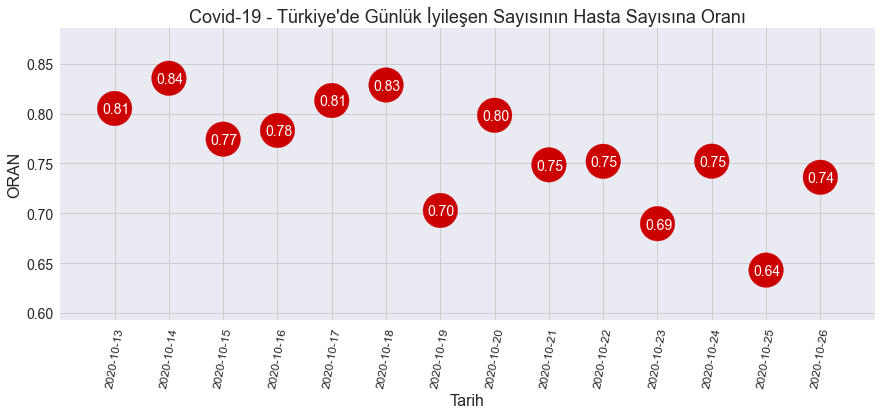

In [14]:
iyilesen_son14 = covid19TR['İyileşen Artış'][-14:]
vaka_son14 = covid19TR['Hasta Artış'][-14:]
oranlar = iyilesen_son14 / vaka_son14
colors = []
for i in range(14):
    if oranlar[i] < 1.0:    colors.append('#cc0000')
    else:    colors.append('#009900')
plt.figure(figsize=(13,5))
plt.scatter(oranlar.index, oranlar, marker="o", s=1200, color=colors)
for i in range(14):
    plt.text(i-0.23, oranlar[i]-0.005, "{:.2f}".format(round(oranlar[i], 2)), color='white')
plt.axis([-1, 14, min(oranlar)-0.05, max(oranlar)+0.05])
plt.title("Covid-19 - Türkiye\'de Günlük İyileşen Sayısının Hasta Sayısına Oranı", fontsize=18)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('ORAN', fontsize=16)
plt.xticks(rotation=80, fontsize=12)
plt.yticks(fontsize=14)
plt.grid(color='#cccccc')
plt.show()

Son iki haftadaki oranlar incelendiğinde ne yazık ki günlük iyileşen hasta sayısının hep günlük vaka sayısının **altında** kalması ve dolayısıyla oranın **1'in altında olması** hala endişe vericidir! En düşük oran **25 Ekim** gününde **0.64** olmuştur.

### **Tüm Günler Hasta/Vefat/İyileşen Sayılarının Birbirleriyle İlişkileri ve Katsayıları**

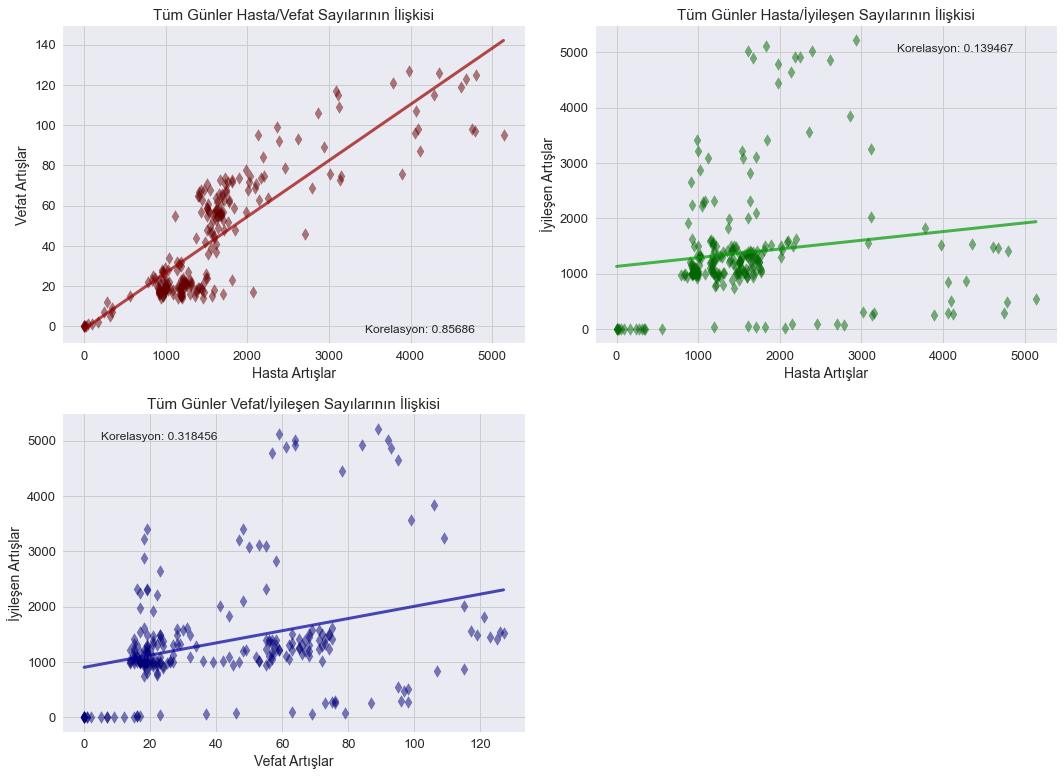

In [15]:
slp1, intcp1 = np.polyfit(covid19TR['Hasta Artış'][1:], covid19TR['Vefat Artış'][1:],1)
x1 = [0, covid19TR['Hasta Artış'].max()]
y1 = [intcp1+x1[0], intcp1+(slp1*x1[1])]
plt.figure(figsize=(15,11))
plt.subplot(2, 2, 1)
plt.plot(x1, y1, alpha=0.7, linewidth=3, color='#990000')
plt.scatter(covid19TR['Hasta Artış'], covid19TR['Vefat Artış'], marker='d', s=70, color='#660000', alpha=0.5)
plt.text(covid19TR['Hasta Artış'].max()-1700, -3,
         "Korelasyon: " + str(round(np.corrcoef(covid19TR['Hasta Artış'][1:], covid19TR['Vefat Artış'][1:])[0,1], 6)),
         fontsize=12)
plt.title('Tüm Günler Hasta/Vefat Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('Vefat Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
slp2, intcp2 = np.polyfit(covid19TR['Hasta Artış'][1:], covid19TR['İyileşen Artış'][1:], 1)
x2 = [0, covid19TR['Hasta Artış'].max()]
y2 = [intcp2+x2[0], intcp2+(slp2*x2[1])]
plt.subplot(2, 2, 2)
plt.scatter(covid19TR['Hasta Artış'], covid19TR['İyileşen Artış'], marker='d', s=70, color='#006600', alpha=0.5)
plt.plot(x2, y2, alpha=0.7, linewidth=3, color='#009900')
plt.text(covid19TR['Hasta Artış'].max()-1700, covid19TR['İyileşen Artış'].max()-200,
        "Korelasyon: " + str(round(np.corrcoef(covid19TR['Hasta Artış'][1:], covid19TR['İyileşen Artış'][1:])[0,1], 6)),
        fontsize=12)
plt.title('Tüm Günler Hasta/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Hasta Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
slp3, intcp3 = np.polyfit(covid19TR['Vefat Artış'][1:], covid19TR['İyileşen Artış'][1:], 1)
x3 = [0, covid19TR['Vefat Artış'].max()]
y3 = [intcp3+x3[0], intcp3+(slp3*x3[1])]
plt.subplot(2, 2, 3)
plt.scatter(covid19TR['Vefat Artış'], covid19TR['İyileşen Artış'], marker='d', s=70, color='#000077', alpha=0.5)
plt.plot(x3, y3, alpha=0.7, linewidth=3, color='#000099')
plt.text(covid19TR['Vefat Artış'].min()+5, covid19TR['İyileşen Artış'].max()-200,
         "Korelasyon: " + str(round(np.corrcoef(covid19TR['Vefat Artış'][1:], covid19TR['İyileşen Artış'][1:])[0,1], 6)),
         fontsize=12)
plt.title('Tüm Günler Vefat/İyileşen Sayılarının İlişkisi', fontsize=15)
plt.xlabel('Vefat Artışlar', fontsize=14)
plt.ylabel('İyileşen Artışlar', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
plt.tight_layout()
plt.show()

### **Her Günün Hasta, Vefat & İyileşen Sayısı Değişimine Dair İstatistikler**

In [16]:
round(covid19TR[['Hasta +/-', 'Vefat +/-', 'İyileşen +/-']].describe(),2)

,Hasta +/-,Vefat +/-,İyileşen +/-
count,228.00,228.00,228.00
mean,9.64,0.33,7.10
std,232.88,4.48,300.92
min,-1528.00,-17.00,-1386.00
25%,-58.75,-2.25,-88.25
50%,5.00,0.00,0.00
75%,70.75,3.00,89.25
max,1094.00,17.00,1232.00


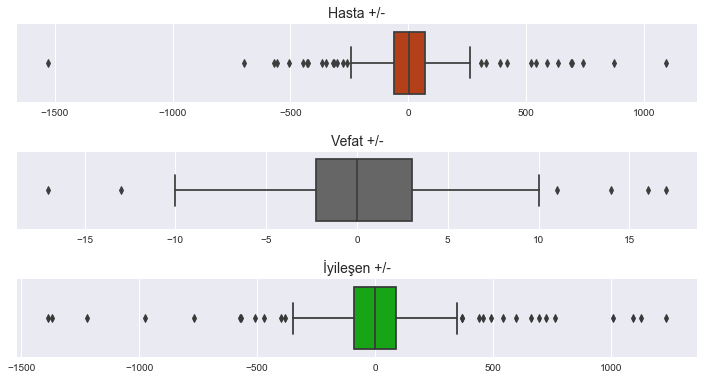

In [17]:
plt.figure(figsize=(10,5.5))
plt.subplot(3,1,1)
sns.boxplot(x=['Hasta +/-'], data=covid19TR, color='#cc3300')
plt.title('Hasta +/-', fontsize=14)
plt.subplot(3,1,2)
sns.boxplot(x=['Vefat +/-'], data=covid19TR, color='#666666')
plt.title('Vefat +/-', fontsize=14)
plt.subplot(3,1,3)
sns.boxplot(x=['İyileşen +/-'], data=covid19TR, color='#00bb00')
plt.title('İyileşen +/-', fontsize=14)
plt.tight_layout()
plt.show()

### **Son 2 Haftadaki Hasta Sayısı Değişim Grafiği**

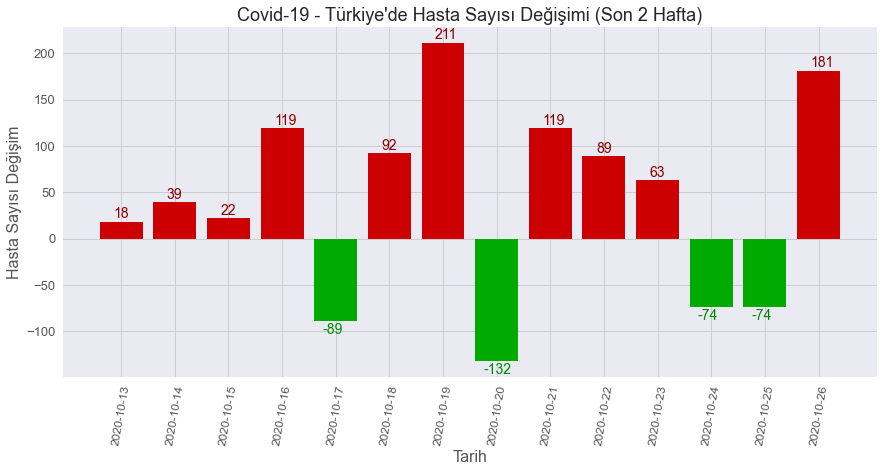

In [18]:
plt.figure(figsize=(13,6))
barc = []
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,12] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-14:], covid19TR['Hasta +/-'][-14:], color=barc)
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,12] >= 0:
        plt.text(i-(len(covid19TR)-13.85), covid19TR.iloc[i,12]+4, int(covid19TR.iloc[i,12]), fontsize=14, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-13.75), covid19TR.iloc[i,12]-14, int(covid19TR.iloc[i,12]), fontsize=14, color='#008800')
plt.title('Covid-19 - Türkiye\'de Hasta Sayısı Değişimi (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Hasta Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Günlük hasta sayısı değişiminde, son iki haftada en çok **211** artış ve en çok da **132** azalış yaşanmıştır.

### **Son 2 Haftadaki Vefat Sayısı Değişim Grafiği**

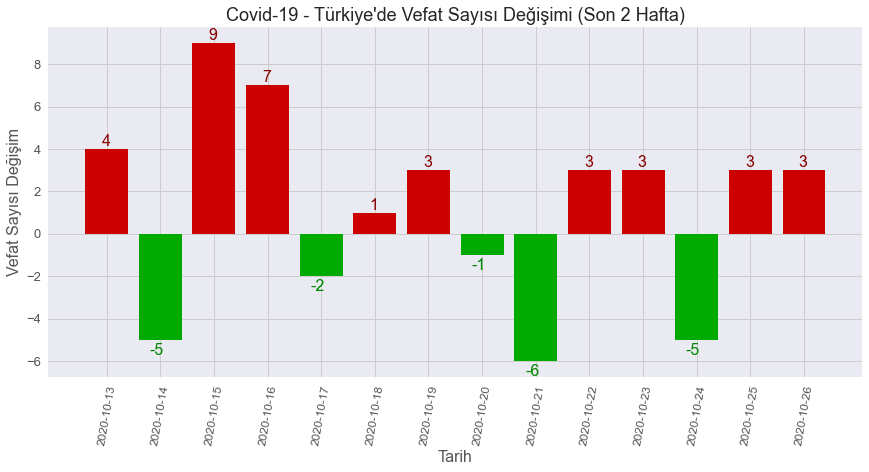

In [19]:
plt.figure(figsize=(13,6))
barc = []
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,13] >= 0:
        barc.append('#cc0000')
    else:   barc.append('#00aa00')
plt.bar(covid19TR.index[-14:], covid19TR['Vefat +/-'][-14:], color=barc)
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,13] >= 0:
        plt.text(i-(len(covid19TR)-13.90), covid19TR.iloc[i,13]+0.15, int(covid19TR.iloc[i,13]), fontsize=16, color='#880000')
    else:
        plt.text(i-(len(covid19TR)-13.80), covid19TR.iloc[i,13]-0.7, int(covid19TR.iloc[i,13]), fontsize=16, color='#008800')
plt.title('Covid-19 - Türkiye\'de Vefat Sayısı Değişimi (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('Vefat Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Yukarıdaki grafiğe göre, vefat sayısı son iki hafta için en fazla **9** yükselmiş ve en fazla **6** azalmıştır.

### **Son 2 Haftadaki İyileşen Hasta Sayısı Değişim Grafiği**

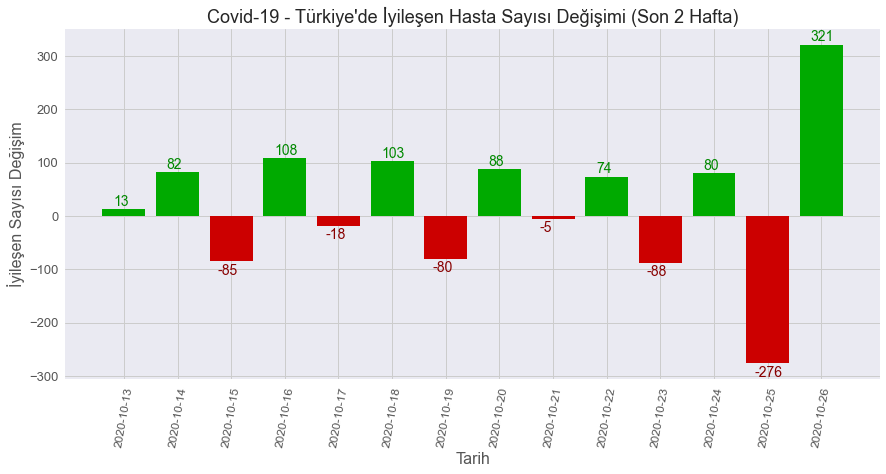

In [20]:
plt.figure(figsize=(13,6))
barc = []
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        barc.append('#00aa00')
    else:   barc.append('#cc0000')
plt.bar(covid19TR.index[-14:], covid19TR['İyileşen +/-'][-14:], color=barc)
plt.xticks(covid19TR.index[-14:], rotation=80, fontsize=12, color='#555555')
plt.yticks(color='#555555', fontsize=13)
for i in range(len(covid19TR)-14,len(covid19TR)):
    if covid19TR.iloc[i,14] >= 0:
        if int(covid19TR.iloc[i,14]) >= 10:
            plt.text(i-(len(covid19TR)-13.8), covid19TR.iloc[i,14]+7, int(covid19TR.iloc[i,14]), fontsize=14, color='#008800')
        else:
            plt.text(i-(len(covid19TR)-13.9), covid19TR.iloc[i,14]+7, int(covid19TR.iloc[i,14]), fontsize=14, color='#008800')
    else:
        plt.text(i-(len(covid19TR)-13.75), covid19TR.iloc[i,14]-25, int(covid19TR.iloc[i,14]), fontsize=14, color='#880000')
plt.title('Covid-19 - Türkiye\'de İyileşen Hasta Sayısı Değişimi (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16, color='#555555')
plt.ylabel('İyileşen Sayısı Değişim', fontsize=16, color='#555555')
plt.grid(color='#cccccc')
plt.show()

Son iki haftadaki iyileşen hasta sayısı değişiminde, en fazla artış **26 Ekim**'de 321 ile gerçekleşirken; en fazla düşüş 276 ile **25 Ekim**'de gerçekleşmiştir. Bu grafikte ilginç olansa günlük değişimin hep bir yükselip bir azalması şeklinde olmasıdır!

### **Son 2 Haftadaki Toplam Aktif Vaka Sayıları**

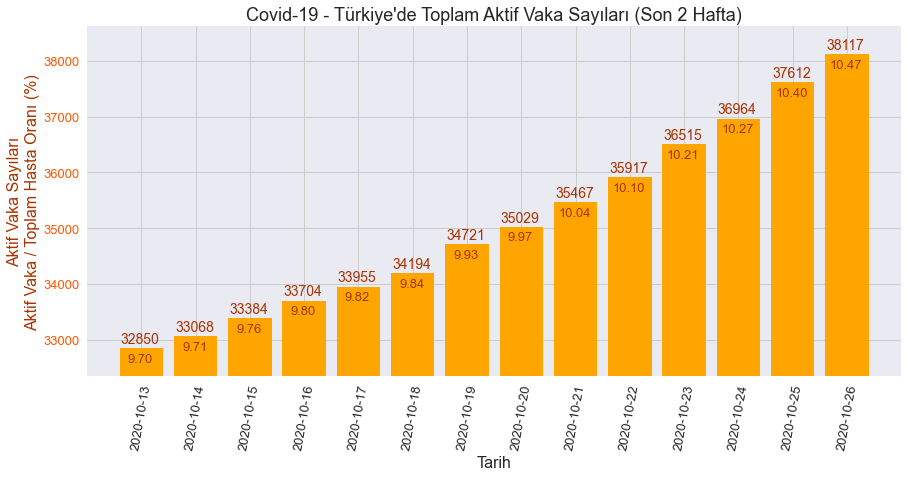

In [21]:
covid19TR['Toplam Aktif Vaka'] = covid19TR['Toplam Hasta'] - covid19TR['Toplam Vefat'] - covid19TR['Toplam İyileşen']
plt.figure(figsize=(13,6))
plt.bar(covid19TR.index[-14:], covid19TR['Toplam Aktif Vaka'][-14:], color='orange')
plt.axis([-1,14,covid19TR['Toplam Aktif Vaka'][-14:].min()-500,covid19TR['Toplam Aktif Vaka'][-14:].max()+500])
for i in range(len(covid19TR)-14,len(covid19TR)):
    plt.text(i-(len(covid19TR)-13.62), covid19TR.iloc[i,15]+90, int(covid19TR.iloc[i,15]),
             fontsize=14, color='#aa3300')
    if covid19TR.iloc[i,15]/covid19TR.iloc[i,0]*100 < 10:
        plt.text(i-(len(covid19TR)-13.75), covid19TR.iloc[i,15]-250, 
             "{:.2f}".format(round(covid19TR.iloc[i,15]/covid19TR.iloc[i,0]*100, 2)), fontsize=13, color='#aa3300')
    else:
        plt.text(i-(len(covid19TR)-13.68), covid19TR.iloc[i,15]-250, 
             "{:.2f}".format(round(covid19TR.iloc[i,15]/covid19TR.iloc[i,0]*100, 2)), fontsize=13, color='#aa3300')
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13, color='#ff5500')
plt.title('Covid-19 - Türkiye\'de Toplam Aktif Vaka Sayıları (Son 2 Hafta)', fontsize=18)
plt.xlabel('Tarih', fontsize=16)
plt.ylabel('Aktif Vaka Sayıları\nAktif Vaka / Toplam Hasta Oranı (%)', fontsize=16, color='#aa3300')
plt.grid(color='#cccccc')
plt.show()

Son aylarda günlük iyileşen hasta sayısının ne yazık ki günlük vaka sayısından **sürekli düşük olması** sebebiyle bu sayının giderek yükselmeye devam ettiği yukarıdaki grafikte net bir şekilde görülmektedir! Aktif vaka sayısının son olarak **38 binin üzerine** çıktığı ve oranın da buna paralel olarak yükselerek en son **%10.47** olarak gerçekleştiği gözlemlenmektedir. 

### **27 Mart-28 Temmuz Arası Toplam Yoğun Bakım ve Entübe Hasta Sayılarına Dair İstatistikler**

In [22]:
round(covid19TR[['Toplam Yoğun Bakım', 'Toplam Entübe']].describe(), 2)

,Toplam Yoğun Bakım,Toplam Entübe
count,124.00,124.00
mean,1120.46,539.24
std,388.95,264.39
min,344.00,241.00
25%,773.50,360.50
50%,1126.50,400.50
75%,1317.75,769.00
max,1922.00,1087.00


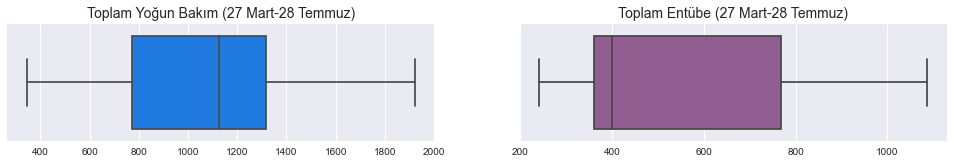

In [23]:
plt.figure(figsize=(15,2))
plt.subplot(1, 2, 1)
sns.boxplot(x=['Toplam Yoğun Bakım'], data=covid19TR, color='#0077ff')
plt.title("Toplam Yoğun Bakım (27 Mart-28 Temmuz)", fontsize=14)
plt.subplot(1, 2, 2)
sns.boxplot(x=['Toplam Entübe'], data=covid19TR, color='#995599')
plt.title("Toplam Entübe (27 Mart-28 Temmuz)", fontsize=14)
plt.show()

**ÖNEMLİ NOT:** 29 Temmuz'dan itibaren _Toplam Yoğun Bakım Sayısı_ ile _Toplam Entübe Hasta Sayısı_ verilerinin paylaşımı durdurulmuştur!

### **1-28 Temmuz Arası Toplam Yoğun Bakım & Entübe Hasta Sayıları**

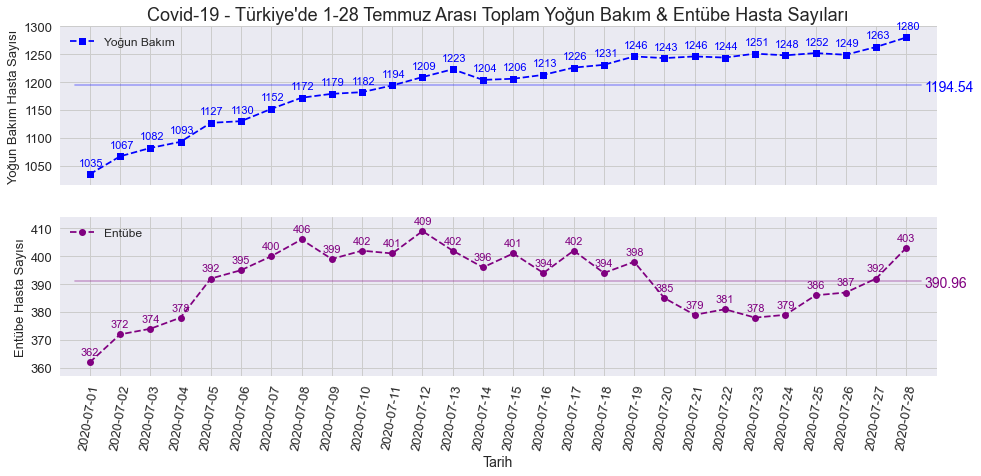

In [24]:
x = [-0.5, 27.5]
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(covid19TR.index[112:140], covid19TR['Toplam Yoğun Bakım'][112:140], 
         linestyle='--', marker='s', label='Yoğun Bakım', color='blue')
for i in range(28):
    plt.text(i-0.35, covid19TR.iloc[i+112,4]+15, int(covid19TR.iloc[i+112,4]), fontsize=11, color='blue')
plt.axis([-1, 28, covid19TR['Toplam Yoğun Bakım'][112:140].min()-20, covid19TR['Toplam Yoğun Bakım'][112:140].max()+20])
yb_ort = covid19TR['Toplam Yoğun Bakım'][112:140].mean()
y1 = [yb_ort, yb_ort]
plt.text(27.6, yb_ort-10, round(yb_ort, 2), color='b')
plt.plot(x, y1, alpha=0.3, color='blue')
plt.xticks(covid19TR.index[112:140], ['' for _ in range(28)])
plt.yticks(fontsize=13)
plt.title('Covid-19 - Türkiye\'de 1-28 Temmuz Arası Toplam Yoğun Bakım & Entübe Hasta Sayıları', fontsize=18)
plt.ylabel('Yoğun Bakım Hasta Sayısı', fontsize=13)
plt.legend(loc='upper left', fontsize=12)
plt.grid(color='#cccccc')
plt.subplot(2,1,2)
plt.plot(covid19TR.index[112:140], covid19TR['Toplam Entübe'][112:140], 
         linestyle='--', marker='o', label='Entübe', color='purple')
for i in range(28):
    plt.text(i-0.3, covid19TR.iloc[i+112,5]+2.5, int(covid19TR.iloc[i+112,5]), fontsize=11, color='purple')
plt.axis([-1, 28, covid19TR['Toplam Entübe'][112:140].min()-5, covid19TR['Toplam Entübe'][112:140].max()+5])
ent_ort = covid19TR['Toplam Entübe'][112:140].mean()
y2 = [ent_ort, ent_ort]
plt.text(27.6, ent_ort-2, round(ent_ort, 2), color='purple')
plt.plot(x, y2, alpha=0.3, color='purple')
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Tarih', fontsize=14)
plt.ylabel('Entübe Hasta Sayısı', fontsize=13)
plt.legend(loc='upper left', fontsize=12)
plt.grid(color='#cccccc')
plt.show()

**1-28 Temmuz tarihleri arasındaki veriler incelendiğinde;**

Toplam yoğun bakım hasta sayısı, **1200'ün** üzerinde ve en son **1280** olarak açıklanmıştı. İlgili grafiğin genel seyrine baktığımızda bu sayının **giderek artabileceği** öngörülebilir.

Toplam entübe hasta sayısı ise en son **403'te** kaldığı ve genel olarak **yatay yönde** seyrettiği gözlemlenebilir, ancak sonraki günler için bu sayının da yükselebileceği ihtimali göz önünde bulundurulmalıdır.

### Son 4 Hafta için Hastalarda Zatürre Oranları ve Ağır Hasta Sayıları

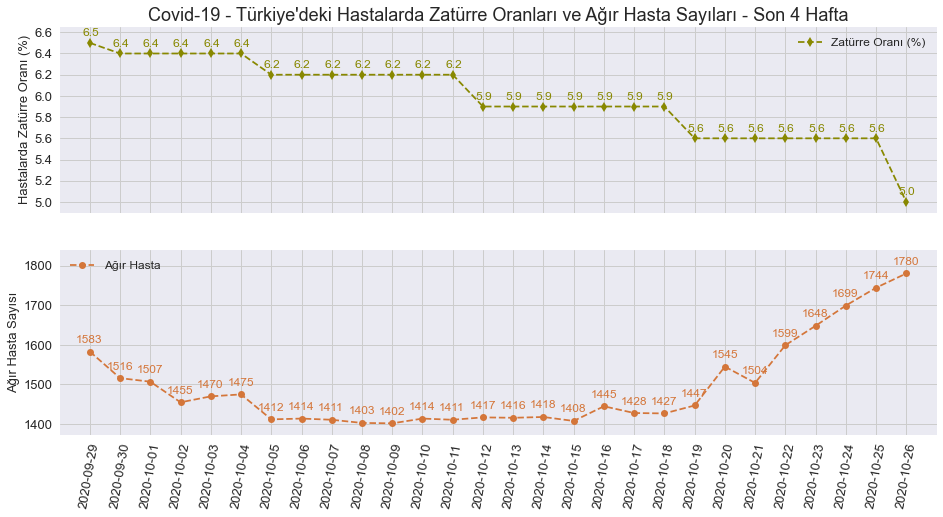

In [25]:
plt.figure(figsize=(14,7))
lm = len(covid19TR)-28
plt.subplot(2,1,1)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,6], linestyle='--', marker='d',
         label='Zatürre Oranı (%)', color='#888800')
for i in range(lm, len(covid19TR)):
    plt.text(i-lm-0.25, covid19TR.iloc[i,6]+0.065, covid19TR.iloc[i,6], fontsize=12, color='#888800')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,6].min()-0.1, covid19TR.iloc[lm:,6].max()+0.15])
plt.title('Covid-19 - Türkiye\'deki Hastalarda Zatürre Oranları ve Ağır Hasta Sayıları - Son 4 Hafta', fontsize=18)
plt.ylabel('Hastalarda Zatürre Oranı (%)', fontsize=13)
plt.xticks(covid19TR.index[lm:], ['' for _ in range(len(covid19TR.index[lm:]))])
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
plt.legend(loc='upper right', fontsize=12)
         
plt.subplot(2,1,2)
plt.plot(covid19TR.index[lm:], covid19TR.iloc[lm:,7], linestyle='--', marker='o',
         label='Ağır Hasta', color='#d4763a')
for i in range(lm,len(covid19TR)):
    plt.text(i-lm-0.45, covid19TR.iloc[i,7]+22, int(covid19TR.iloc[i,7]), fontsize=12, color='#d4763a')
plt.axis([-1, len(covid19TR.index[lm:]), covid19TR.iloc[lm:,7].min()-30, covid19TR.iloc[lm:,7].max()+60])
plt.ylabel('Ağır Hasta Sayısı', fontsize=13)
plt.xticks(rotation=80, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(color='#cccccc')
plt.legend(loc='upper left', fontsize=12)
plt.show()

**Son 4 haftada hastalardaki zatürre oranları ve ağır hasta sayıları için;**

_Hastalarda Zatürre Oranı,_ **%6.5**'ten günler geçtikçe azalarak son olarak **%5.0**'a kadar gerilemiştir.

**Not:** Bu oranın haftalık bazda verildiği ve ilgili günlerde dolayısıyla aynı olarak kaldığı dikkate alınmalıdır.

_Ağir Hasta Sayısı_ da, önceleri biraz düşüş göstermesine rağmen, son bir haftada da **giderek artmaya** devam ederek en son **26 Ekim**'de 1780 olmuştur!

### Hasta, Vefat, İyileşen & Test Artışlarının İkişer Haftalık Toplamları

In [26]:
covid19TR['Test +/-'] = covid19TR['Test Artış'].diff()
analiz_sutunlar = ['Hasta Artış', 'Vefat Artış', 'İyileşen Artış', 'Test Artış',
                   'Hasta +/-', 'Vefat +/-', 'İyileşen +/-', 'Test +/-']
covid19TR = covid19TR.reset_index()
covid19TR['Tarih'] = pd.to_datetime(covid19TR['Tarih'])
covid19TR_haftalik_toplam = covid19TR.resample('2W', on='Tarih')[analiz_sutunlar[:4]].sum()
round(covid19TR_haftalik_toplam, 2)

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış
Tarih,,,,
2020-03-15,17.0,0.0,0.0,0.0
2020-03-29,9199.0,131.0,105.0,17623.0
2020-04-12,47739.0,1067.0,3341.0,310654.0
2020-04-26,53174.0,1607.0,25694.0,513642.0
2020-05-10,28527.0,981.0,63551.0,480856.0
2020-05-24,18170.0,554.0,26003.0,461664.0
2020-06-07,13305.0,352.0,19275.0,506331.0
2020-06-21,17553.0,258.0,22271.0,606647.0
2020-07-05,18073.0,275.0,20440.0,685240.0


### Aynı Sütunların ve Değişimlerinin İkişer Haftalık Ortalamaları

In [27]:
covid19TR_haftalik_ortalama = covid19TR.resample('2W', on='Tarih')[analiz_sutunlar].mean().fillna(0)
round(covid19TR_haftalik_ortalama, 2)

,Hasta Artış,Vefat Artış,İyileşen Artış,Test Artış,Hasta +/-,Vefat +/-,İyileşen +/-,Test +/-
Tarih,,,,,,,,
2020-03-15,4.25,0.00,0.00,0.00,4.00,0.00,0.00,0.00
2020-03-29,657.07,9.36,7.50,8811.50,128.79,1.64,2.50,2341.00
2020-04-12,3409.93,76.21,238.64,22189.57,212.43,5.29,31.86,1838.43
2020-04-26,3798.14,114.79,1835.29,36688.71,-173.71,0.14,219.79,-1038.79
2020-05-10,2037.64,70.07,4539.36,34346.86,-58.21,-3.71,-24.79,1072.14
2020-05-24,1297.86,39.57,1857.36,32976.00,-28.64,-1.07,-151.36,-828.43
2020-06-07,950.36,25.14,1376.79,36166.50,-16.21,-0.64,111.07,767.57
2020-06-21,1253.79,18.43,1590.79,43331.93,19.86,0.00,-88.21,368.64
2020-07-05,1290.93,19.64,1460.00,48945.71,-3.14,-0.29,-16.00,422.71


**Sonuç olarak; yukarıdaki analizlerde rakamlar ve görseller gösteriyor ki Türkiye'deki Koronavirüs tehlikesinin sonbahar ve kış mevsimlerinde yükselmeye devam edeceğini açıkça gösteriyor!**

**Dolayısıyla, ilerleyen aylarda virüsün yayılmasına engel olmak için asla virüs yokmuş gibi davranmamaya; kendimizi, sevdiklerimizi ve etrafımızdaki insanları önemseyerek önlemlerimizi alarak kontrollü yaşamaya devam edelim. Zorunlu kalmadıkça dışarı çıkmayalım; eğer dışarıdaysak maske takmaya, dezenfaktan kullanmaya, kalabalık ortamlarda fazla kalmamaya ve açık/kapalı alanlarda sosyal mesafeyi korumaya özen gösterelim!**

## Virüsü tamamen yendiğimiz günlerde buluşmak dileğiyle...